# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.538  1  0.784 0.377 0.004   
                             age        0.059  1  0.087 0.769 0.000   
                             Kiel       2.305  1  3.361 0.068 0.017   
                             Magdeburg  5.774  1  8.419 0.004 0.042   
                             Sweden     9.139  1 13.326 0.000 0.065   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.113  1  0.117 0.733 0.001   
                             age        0.284  1  0.293 0.589 0.002   
                             Kiel       0.123  1  0.127 0.722 0.001   
                             Magdeburg  1.817  1  1.876 0.172 0.010   
                             Sweden    17.948  1 18.527 0.000 0.088   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.424  0.539    False  
                             age               0.114  0.859    False  
                             Kiel              1.166  0.154    False  
                             Magdeburg         2.382  0.016     True  
                             Sweden            3.471  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.135  0.832    False  
                             age               0.230  0.720    False  
                             Kiel              0.141  0.825    False  
                             Magdeburg         0.763  0.311    False  
                             Sweden            4.573  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      RF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.939  1  7.070 0.009 0.036   
                             age        0.002  1  0.012 0.915 0.000   
                             Kiel       0.201  1  1.511 0.221 0.008   
                             Magdeburg  0.413  1  3.109 0.079 0.016   
                             Sweden     1.564  1 11.776 0.001 0.058   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.708  1  1.482 0.225 0.008   
                             age        0.529  1  1.109 0.294 0.006   
                             Kiel       1.975  1  4.136 0.043 0.021   
                             Magdeburg  2.657  1  5.564 0.019 0.028   
                             Sweden    14.418  1 30.198 0.000 0.137   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.070  0.025     True  
                             age               0.039  0.948    False  
                             Kiel              0.657  0.347    False  
                             Magdeburg         1.100  0.155    False  
                             Sweden            3.134  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.648  0.353    False  
                             age               0.532  0.432    False  
                             Kiel              1.363  0.095    False  
                             Magdeburg         1.714  0.049     True  
                             Sweden            6.908  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.377         0.424  0.539    False   
                             age       0.769         0.114  0.859    False   
                             Kiel      0.068         1.166  0.154    False   
                             Magdeburg 0.004         2.382  0.016     True   
                             Sweden    0.000         3.471  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.733         0.135  0.832    False   
                             age       0.589         0.230  0.720    False   
                             Kiel      0.722         0.141  0.825    False   
                             Magdeburg 0.172         0.763  0.311    False   
                             Sweden    0.000         4.573  0.000     True   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.009         2.070  0.025     True  
                             age       0.915         0.039  0.948    False  
                             Kiel      0.221         0.657  0.347    False  
                             Magdeburg 0.079         1.100  0.155    False  
                             Sweden    0.001         3.134  0.003     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.225         0.648  0.353    False  
                             age       0.294         0.532  0.432    False  
                             Kiel      0.043         1.363  0.095    False  
                             Magdeburg 0.019         1.714  0.049     True  
                             Sweden    0.000         6.908  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.488     0.335     0.233         3.094     0.291
std       0.302         5.354     0.330     0.297         5.844     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.337     0.015     0.001         0.391     0.003
50%       0.119         0.925     0.237     0.070         1.157     0.139
75%       0.460         2.432     0.614     0.406         3.093     0.542
max       0.999       149.679     0.999     0.999        84.401     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.377         0.424   
A0A024R0T9;K7ER74;P02655                           AD     0.059         1.231   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.122         0.914   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.575         0.241   
A0A075B6H7                                         AD     0.204         0.691   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.047         1.324   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.542         0.266   
S4R3U6                                             AD     0.733         0.135   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.539    False   
A0A024R0T9;K7ER74;P02655                           AD      0.138    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.242    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.708    False   
A0A075B6H7                                         AD      0.350    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.116    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.683    False   
S4R3U6                                             AD      0.832    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.009         2.070   
A0A024R0T9;K7ER74;P02655                           AD     0.033         1.483   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.440         0.357   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.251         0.601   
A0A075B6H7                                         AD     0.007         2.177   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.184         0.735   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.361         0.443   
S4R3U6                                             AD     0.225         0.648   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.025     True  
A0A024R0T9;K7ER74;P02655                           AD      0.076    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.575    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.383    False  
A0A075B6H7                                         AD      0.020     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.251         1.417     0.332     0.248         1.517     0.313
std       0.290         1.631     0.316     0.296         1.766     0.319
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.011         0.365     0.035     0.009         0.364     0.025
50%       0.115         0.939     0.232     0.103         0.986     0.192
75%       0.432         1.970     0.591     0.432         2.067     0.568
max       0.999        22.313     0.999     0.999        19.825     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1021,971


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.377         0.424  0.539   
A0A024R0T9;K7ER74;P02655                           0.059         1.231  0.138   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.122         0.914  0.242   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.575         0.241  0.708   
A0A075B6H7                                         0.204         0.691  0.350   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.047         1.324  0.116   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.542         0.266  0.683   
S4R3U6                                             0.733         0.135  0.832   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.009   
A0A024R0T9;K7ER74;P02655                              False 0.033   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.440   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.251   
A0A075B6H7                                            False 0.007   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.184   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.361   
S4R3U6                                                False 0.225   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.070  0.025   
A0A024R0T9;K7ER74;P02655                                   1.483  0.076   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.357  0.575   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.601  0.383   
A0A075B6H7                                                 2.177  0.020   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.291   
Q9Y6X5                                                     0.735  0.302   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.161   
Q9Y6Y9                                                     0.443  0.498   
S4R3U6                                                     0.648  0.353   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    895
PI (yes) - RF (yes)   324
PI (no)  - RF (yes)   126
PI (yes) - RF (no)     76
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                  RF  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.377         0.424  0.539    False 0.009   
A0A075B6H7                   0.204         0.691  0.350    False 0.007   
A0A075B6Q5                   0.726         0.139  0.828    False 0.015   
A0A075B6R2                   0.281         0.552  0.440    False 0.001   
A0A075B7B8                   0.293         0.533  0.453    False 0.000   
...                            ...           ...    ...      ...   ...   
Q9UKB5                       0.005         2.267  0.020     True 0.311   
Q9ULZ9                       0.000         4.074  0.001     True 0.047   
Q9UNW1                       0.008         2.075  0.029     True 0.668   
Q9UP79                       0.135         0.869  0.262    False 0.000   
Q9UQ52                       0.141         0.850  0.270    False 0.001   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.070  0.025     True       186  
A0A075B6H7                           2.177  0.020     True        91  
A0A075B6Q5                           1.838  0.038     True       104  
A0A075B6R2                           2.856  0.005     True       164  
A0A075B7B8                           4.026  0.000     True        57  
...                                    ...    ...      ...       ...  
Q9UKB5                               0.508  0.450    False       148  
Q9ULZ9                               1.330  0.101    False       171  
Q9UNW1                               0.175  0.768    False       171  
Q9UP79                               3.751  0.001     True       135  
Q9UQ52                               3.002  0.004     True       188  

[202 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.539,0.025,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.138,0.076,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.242,0.575,174,PI (no) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.708,0.383,196,PI (no) - RF (no)
A0A075B6H7,0.350,0.020,91,PI (no) - RF (yes)
...,...,...,...,...
Q9Y6R7,0.315,0.291,197,PI (no) - RF (no)
Q9Y6X5,0.116,0.302,173,PI (no) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.161,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P35754,0.013,0.982,143,PI (yes) - RF (no),0.969
Q96PQ0,0.005,0.972,177,PI (yes) - RF (no),0.967
A0A087X1Z2;C9JTV4;H0Y4Y4;Q8WYH2;Q96C19;Q9BUP0;Q9BUP0-2,0.000,0.941,66,PI (yes) - RF (no),0.941
P33151,0.035,0.972,151,PI (yes) - RF (no),0.937
G3V2U7;P07311,0.033,0.967,130,PI (yes) - RF (no),0.934
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.057,0.048,197,PI (no) - RF (yes),0.008
Q9NX62,0.055,0.047,197,PI (no) - RF (yes),0.008
P00740;P00740-2,0.052,0.044,197,PI (no) - RF (yes),0.008


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


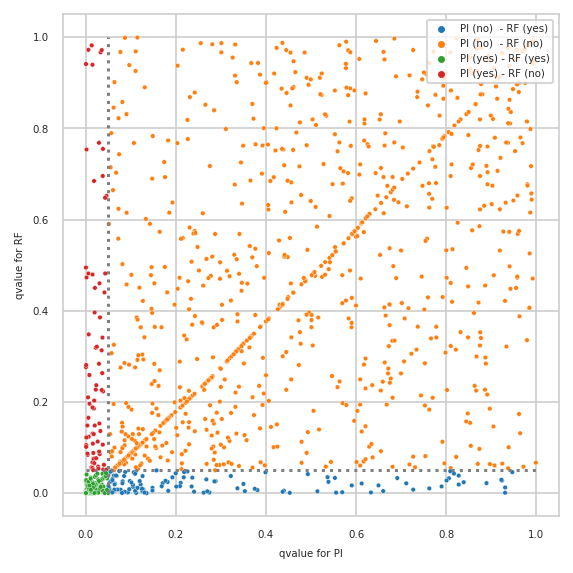

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


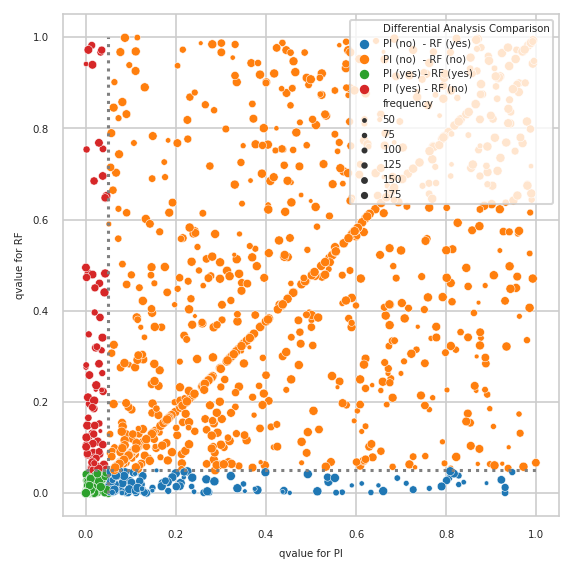

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out